# **WElCOME TO PART TWO** 🖼️

## let's import all the make ups that we need to beautify our ugly bride 💄

In [40]:
import pandas as pd
import nltk
from cleantext.sklearn import CleanTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.express as px
import re
sns.set_theme(style="darkgrid")
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger

## now that we have that out of the way time to load the data and 🔬

In [4]:
df = pd.read_csv('vaccine.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   url                    3000 non-null   object
 1   rawContent             3000 non-null   object
 2   id                     3000 non-null   int64 
 3   replyCount             3000 non-null   int64 
 4   retweetCount           3000 non-null   int64 
 5   likeCount              3000 non-null   int64 
 6   quoteCount             3000 non-null   int64 
 7   conversationId         3000 non-null   int64 
 8   lang                   3000 non-null   object
 9   source                 3000 non-null   object
 10  sourceLabel            3000 non-null   object
 11  username               3000 non-null   object
 12  verified               3000 non-null   bool  
 13  created                3000 non-null   object
 14  followersCount         3000 non-null   int64 
 15  friendsCount         

## might it have some null values 🤔

In [29]:
df.isna().sum()

url                         0
rawContent                  0
id                          0
replyCount                  0
retweetCount                0
likeCount                   0
quoteCount                  0
conversationId              0
lang                        0
source                      0
sourceLabel                 0
username                    0
verified                    0
created                     0
followersCount              0
friendsCount                0
protected                   0
label.description        2991
label.url                2996
label.badgeUrl           2991
label.longDescription    2995
date_day                    0
date_month                  0
date_WeekDay                0
date_Quarter                0
date_year                   0
Tweet time                  0
monthname                   0
dayname                     0
dtype: int64

#### as suspected `label.description label.url label.badgeUrl label.longDescription` caught but I am not going to do nothing to them since they don't mean 💩 

In [30]:
df.head()

,url,rawContent,id,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,...,label.badgeUrl,label.longDescription,date_day,date_month,date_WeekDay,date_Quarter,date_year,Tweet time,monthname,dayname
0,https://twitter.com/prajasakshinews/status/161...,Covovax vaccine: మ‌రో 15 రోజుల్లో ఆమోదం.. బూస్...,1612410474062319616,0,0,0,0,1612410474062319616,te,"<a href=""https://mobile.twitter.com"" rel=""nofo...",...,NaN,NaN,9,1,0,1,2023,11:26:28,January,Monday
1,https://twitter.com/cliffordribner/status/1612...,Nurse: Majority of Delta patients at hospital ...,1612410443640758272,0,0,0,0,1612410443640758272,en,"<a href=""https://cliffordribner.com/"" rel=""nof...",...,NaN,NaN,9,1,0,1,2023,11:26:21,January,Monday
2,https://twitter.com/cliffordribner/status/1612...,Los Angeles Imposes COVID-19 Passport on Child...,1612410440310456321,0,0,0,0,1612410440310456321,en,"<a href=""https://cliffordribner.com/"" rel=""nof...",...,NaN,NaN,9,1,0,1,2023,11:26:20,January,Monday
3,https://twitter.com/nicksback1953/status/16124...,Today @ https://t.co/H5o05CtuQ3 o.a.:\n\nMajor...,1612408656896606211,0,0,0,0,1612408656896606211,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",...,NaN,NaN,9,1,0,1,2023,11:19:15,January,Monday
4,https://twitter.com/B_Foster02/status/16124086...,#shorts Dr. Ryan Cole prat1 #vaccine #covid...,1612408637997322240,0,0,0,0,1612408637997322240,in,"<a href=""https://mobile.twitter.com"" rel=""nofo...",...,NaN,NaN,9,1,0,1,2023,11:19:11,January,Monday


### **let's Draw**
* what are people using to Tweet
    * let's see top 10 that **"THEY"** used

In [31]:
df['sourceLabel'].value_counts()

Twitter Web App                1037
Twitter for iPhone              943
Twitter for Android             512
Bitly                           112
Twitter for iPad                 72
                               ... 
excite blog                       1
CVS Maryland Vaccine Finder       1
Tumblr                            1
Twitter for Advertisers           1
Tweepsmap                         1
Name: sourceLabel, Length: 78, dtype: int64

In [32]:
nams=df['sourceLabel'].value_counts()[:10].keys()
fig = px.pie(df, values=df['sourceLabel'].value_counts()[:10], names=nams, title='Top Ten sources That The People Used to tweet',color_discrete_sequence=px.colors.sequential.algae)
fig.show()

### **Nice** What  next ?
#### how about the time where there was **high** tweets?
* ##### **day wise**
* ##### **hour wise**

In [33]:
px.histogram(df, x='dayname', color="dayname")

In [34]:
df['Tweet time'] = pd.to_datetime(df['Tweet time'])
df['hours'] = df['Tweet time'].dt.hour
df.head()

,url,rawContent,id,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,...,label.longDescription,date_day,date_month,date_WeekDay,date_Quarter,date_year,Tweet time,monthname,dayname,hours
0,https://twitter.com/prajasakshinews/status/161...,Covovax vaccine: మ‌రో 15 రోజుల్లో ఆమోదం.. బూస్...,1612410474062319616,0,0,0,0,1612410474062319616,te,"<a href=""https://mobile.twitter.com"" rel=""nofo...",...,NaN,9,1,0,1,2023,2023-02-20 11:26:28,January,Monday,11
1,https://twitter.com/cliffordribner/status/1612...,Nurse: Majority of Delta patients at hospital ...,1612410443640758272,0,0,0,0,1612410443640758272,en,"<a href=""https://cliffordribner.com/"" rel=""nof...",...,NaN,9,1,0,1,2023,2023-02-20 11:26:21,January,Monday,11
2,https://twitter.com/cliffordribner/status/1612...,Los Angeles Imposes COVID-19 Passport on Child...,1612410440310456321,0,0,0,0,1612410440310456321,en,"<a href=""https://cliffordribner.com/"" rel=""nof...",...,NaN,9,1,0,1,2023,2023-02-20 11:26:20,January,Monday,11
3,https://twitter.com/nicksback1953/status/16124...,Today @ https://t.co/H5o05CtuQ3 o.a.:\n\nMajor...,1612408656896606211,0,0,0,0,1612408656896606211,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",...,NaN,9,1,0,1,2023,2023-02-20 11:19:15,January,Monday,11
4,https://twitter.com/B_Foster02/status/16124086...,#shorts Dr. Ryan Cole prat1 #vaccine #covid...,1612408637997322240,0,0,0,0,1612408637997322240,in,"<a href=""https://mobile.twitter.com"" rel=""nofo...",...,NaN,9,1,0,1,2023,2023-02-20 11:19:11,January,Monday,11


In [35]:
px.histogram(df, x='hours', color="hours")

### fulll disclaimer I shouldn't have broken the time Df like that for now amma STOP by this and move on to sentiment analysis but I will do a whole bunch of staff with time only on another **repo**

# **sentiment**

* well i need to to extract the content field 
* need only 'english' for now 
* need to choose the right library to for my data
* need to choose right visualization for it too 

In [6]:
df['text'] = df['rawContent'].astype(str).str.lower()
df.head(3)

,url,rawContent,id,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,...,label.longDescription,date_day,date_month,date_WeekDay,date_Quarter,date_year,Tweet time,monthname,dayname,text
0,https://twitter.com/prajasakshinews/status/161...,Covovax vaccine: మ‌రో 15 రోజుల్లో ఆమోదం.. బూస్...,1612410474062319616,0,0,0,0,1612410474062319616,te,"<a href=""https://mobile.twitter.com"" rel=""nofo...",...,NaN,9,1,0,1,2023,11:26:28,January,Monday,covovax vaccine: మ‌రో 15 రోజుల్లో ఆమోదం.. బూస్...
1,https://twitter.com/cliffordribner/status/1612...,Nurse: Majority of Delta patients at hospital ...,1612410443640758272,0,0,0,0,1612410443640758272,en,"<a href=""https://cliffordribner.com/"" rel=""nof...",...,NaN,9,1,0,1,2023,11:26:21,January,Monday,nurse: majority of delta patients at hospital ...
2,https://twitter.com/cliffordribner/status/1612...,Los Angeles Imposes COVID-19 Passport on Child...,1612410440310456321,0,0,0,0,1612410440310456321,en,"<a href=""https://cliffordribner.com/"" rel=""nof...",...,NaN,9,1,0,1,2023,11:26:20,January,Monday,los angeles imposes covid-19 passport on child...


### first let's download all the resources

In [7]:
nltk.download([
     "names",
     "stopwords",
    "twitter_samples",
     "averaged_perceptron_tagger",
     "vader_lexicon",
    "punkt",
 ])

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already u

True

#### I have done many things here but the one that fully worked for me was using ***`regex`*** 

In [8]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

df['text_token']=df['text'].apply(regexp.tokenize)
df.head(3)

,url,rawContent,id,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,...,date_day,date_month,date_WeekDay,date_Quarter,date_year,Tweet time,monthname,dayname,text,text_token
0,https://twitter.com/prajasakshinews/status/161...,Covovax vaccine: మ‌రో 15 రోజుల్లో ఆమోదం.. బూస్...,1612410474062319616,0,0,0,0,1612410474062319616,te,"<a href=""https://mobile.twitter.com"" rel=""nofo...",...,9,1,0,1,2023,11:26:28,January,Monday,covovax vaccine: మ‌రో 15 రోజుల్లో ఆమోదం.. బూస్...,"[covovax, vaccine, మ, ర, 15, ర, జ, ల, ల, ఆమ, ద..."
1,https://twitter.com/cliffordribner/status/1612...,Nurse: Majority of Delta patients at hospital ...,1612410443640758272,0,0,0,0,1612410443640758272,en,"<a href=""https://cliffordribner.com/"" rel=""nof...",...,9,1,0,1,2023,11:26:21,January,Monday,nurse: majority of delta patients at hospital ...,"[nurse, majority, of, delta, patients, at, hos..."
2,https://twitter.com/cliffordribner/status/1612...,Los Angeles Imposes COVID-19 Passport on Child...,1612410440310456321,0,0,0,0,1612410440310456321,en,"<a href=""https://cliffordribner.com/"" rel=""nof...",...,9,1,0,1,2023,11:26:20,January,Monday,los angeles imposes covid-19 passport on child...,"[los, angeles, imposes, covid, 19, passport, o..."


In [9]:
from nltk.corpus import stopwords

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Extend the list with your own custom stopwords
my_stopwords = ['https','href','rel','http']
stopwords.extend(my_stopwords)

### REmove the Stop Words

In [10]:
df['text_token'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head(3)

,url,rawContent,id,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,...,date_day,date_month,date_WeekDay,date_Quarter,date_year,Tweet time,monthname,dayname,text,text_token
0,https://twitter.com/prajasakshinews/status/161...,Covovax vaccine: మ‌రో 15 రోజుల్లో ఆమోదం.. బూస్...,1612410474062319616,0,0,0,0,1612410474062319616,te,"<a href=""https://mobile.twitter.com"" rel=""nofo...",...,9,1,0,1,2023,11:26:28,January,Monday,covovax vaccine: మ‌రో 15 రోజుల్లో ఆమోదం.. బూస్...,"[covovax, vaccine, మ, ర, 15, ర, జ, ల, ల, ఆమ, ద..."
1,https://twitter.com/cliffordribner/status/1612...,Nurse: Majority of Delta patients at hospital ...,1612410443640758272,0,0,0,0,1612410443640758272,en,"<a href=""https://cliffordribner.com/"" rel=""nof...",...,9,1,0,1,2023,11:26:21,January,Monday,nurse: majority of delta patients at hospital ...,"[nurse, majority, delta, patients, hospital, v..."
2,https://twitter.com/cliffordribner/status/1612...,Los Angeles Imposes COVID-19 Passport on Child...,1612410440310456321,0,0,0,0,1612410440310456321,en,"<a href=""https://cliffordribner.com/"" rel=""nof...",...,9,1,0,1,2023,11:26:20,January,Monday,los angeles imposes covid-19 passport on child...,"[los, angeles, imposes, covid, 19, passport, c..."


### Remove infrequent words
* We first change the format of text_token to strings and keep only words which are longer than 2 letters

In [11]:
df['text_string'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

### let's see if there any change between the stages

In [12]:
df[['text', 'text_token', 'text_string']].head()

,text,text_token,text_string
0,covovax vaccine: మ‌రో 15 రోజుల్లో ఆమోదం.. బూస్...,"[covovax, vaccine, మ, ర, 15, ర, జ, ల, ల, ఆమ, ద...",covovax vaccine nentf6gj6g adarpoonawalla boos...
1,nurse: majority of delta patients at hospital ...,"[nurse, majority, delta, patients, hospital, v...",nurse majority delta patients hospital vaccina...
2,los angeles imposes covid-19 passport on child...,"[los, angeles, imposes, covid, 19, passport, c...",los angeles imposes covid passport children ag...
3,today @ https://t.co/h5o05ctuq3 o.a.:\n\nmajor...,"[today, co, h5o05ctuq3, major, shift, jfk, ass...",today h5o05ctuq3 major shift jfk assassination...
4,#shorts dr. ryan cole prat1 #vaccine #covid...,"[shorts, dr, ryan, cole, prat1, vaccine, covid...",shorts ryan cole prat1 vaccine covid gvllg90gy...


* create a list of all words

In [13]:
all_words = ' '.join([word for word in df['text_string']])

* tokenize it

In [14]:
tokenized_words = nltk.tokenize.word_tokenize(all_words)

* by using `FreqDist` we can count every word to remove the least called one to ease with analysis portion

In [15]:

from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'vaccine': 3391, 'covid': 925, 'covid19': 500, 'vaccinedeath': 349, 'people': 303, 'amp': 299, 'vaccines': 286, 'mrna': 273, 'vaccineinjuries': 269, 'vaccinesideeffects': 251, ...})

* let's drop word that are used let's than `10` times why not! beacause we had little data set

In [16]:
df['text_string_fdist'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 10 ]))

## one last time check in our data sets

In [17]:
df[['text', 'text_token', 'text_string', 'text_string_fdist']].head()

,text,text_token,text_string,text_string_fdist
0,covovax vaccine: మ‌రో 15 రోజుల్లో ఆమోదం.. బూస్...,"[covovax, vaccine, మ, ర, 15, ర, జ, ల, ల, ఆమ, ద...",covovax vaccine nentf6gj6g adarpoonawalla boos...,covovax vaccine boosterdose covovax vaccine
1,nurse: majority of delta patients at hospital ...,"[nurse, majority, delta, patients, hospital, v...",nurse majority delta patients hospital vaccina...,majority patients hospital vaccinated coronavi...
2,los angeles imposes covid-19 passport on child...,"[los, angeles, imposes, covid, 19, passport, c...",los angeles imposes covid passport children ag...,covid children aged children covid mandate vac...
3,today @ https://t.co/h5o05ctuq3 o.a.:\n\nmajor...,"[today, co, h5o05ctuq3, major, shift, jfk, ass...",today h5o05ctuq3 major shift jfk assassination...,today major new covid vaccine world genocide f...
4,#shorts dr. ryan cole prat1 #vaccine #covid...,"[shorts, dr, ryan, cole, prat1, vaccine, covid...",shorts ryan cole prat1 vaccine covid gvllg90gy...,shorts ryan cole prat1 vaccine covid via youtube


# lemmatization 

In [18]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [19]:
from nltk.stem import WordNetLemmatizer
wrdnet_lmt= WordNetLemmatizer()
df['text_string_lem'] = df['text_string_fdist'].apply(wrdnet_lmt.lemmatize)

### come to find out that this steps by passes some rows cause there are no words to lematize so checking is good

In [20]:
df['is_equal']= (df['text_string_fdist']==df['text_string_lem'])


In [21]:
df.is_equal.value_counts()

True    3000
Name: is_equal, dtype: int64

In [22]:
df.head()

,url,rawContent,id,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,...,date_year,Tweet time,monthname,dayname,text,text_token,text_string,text_string_fdist,text_string_lem,is_equal
0,https://twitter.com/prajasakshinews/status/161...,Covovax vaccine: మ‌రో 15 రోజుల్లో ఆమోదం.. బూస్...,1612410474062319616,0,0,0,0,1612410474062319616,te,"<a href=""https://mobile.twitter.com"" rel=""nofo...",...,2023,11:26:28,January,Monday,covovax vaccine: మ‌రో 15 రోజుల్లో ఆమోదం.. బూస్...,"[covovax, vaccine, మ, ర, 15, ర, జ, ల, ల, ఆమ, ద...",covovax vaccine nentf6gj6g adarpoonawalla boos...,covovax vaccine boosterdose covovax vaccine,covovax vaccine boosterdose covovax vaccine,True
1,https://twitter.com/cliffordribner/status/1612...,Nurse: Majority of Delta patients at hospital ...,1612410443640758272,0,0,0,0,1612410443640758272,en,"<a href=""https://cliffordribner.com/"" rel=""nof...",...,2023,11:26:21,January,Monday,nurse: majority of delta patients at hospital ...,"[nurse, majority, delta, patients, hospital, v...",nurse majority delta patients hospital vaccina...,majority patients hospital vaccinated coronavi...,majority patients hospital vaccinated coronavi...,True
2,https://twitter.com/cliffordribner/status/1612...,Los Angeles Imposes COVID-19 Passport on Child...,1612410440310456321,0,0,0,0,1612410440310456321,en,"<a href=""https://cliffordribner.com/"" rel=""nof...",...,2023,11:26:20,January,Monday,los angeles imposes covid-19 passport on child...,"[los, angeles, imposes, covid, 19, passport, c...",los angeles imposes covid passport children ag...,covid children aged children covid mandate vac...,covid children aged children covid mandate vac...,True
3,https://twitter.com/nicksback1953/status/16124...,Today @ https://t.co/H5o05CtuQ3 o.a.:\n\nMajor...,1612408656896606211,0,0,0,0,1612408656896606211,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",...,2023,11:19:15,January,Monday,today @ https://t.co/h5o05ctuq3 o.a.:\n\nmajor...,"[today, co, h5o05ctuq3, major, shift, jfk, ass...",today h5o05ctuq3 major shift jfk assassination...,today major new covid vaccine world genocide f...,today major new covid vaccine world genocide f...,True
4,https://twitter.com/B_Foster02/status/16124086...,#shorts Dr. Ryan Cole prat1 #vaccine #covid...,1612408637997322240,0,0,0,0,1612408637997322240,in,"<a href=""https://mobile.twitter.com"" rel=""nofo...",...,2023,11:19:11,January,Monday,#shorts dr. ryan cole prat1 #vaccine #covid...,"[shorts, dr, ryan, cole, prat1, vaccine, covid...",shorts ryan cole prat1 vaccine covid gvllg90gy...,shorts ryan cole prat1 vaccine covid via youtube,shorts ryan cole prat1 vaccine covid via youtube,True


## let's check the Frequency Distribution!

In [23]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
all_words_lem = ' '.join([word for word in df['text_string_lem']])
words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

## most common words?

In [26]:
fd.tabulate(10)

           vaccine              covid            covid19       vaccinedeath             people                amp           vaccines               mrna    vaccineinjuries vaccinesideeffects 
              3391                925                500                349                303                299                286                273                269                251 


### let's get "Fancy"

In [35]:
top_10=fd.most_common(10)
fancis = pd.Series(dict(top_10))

In [38]:
px.histogram(fancis, x=fancis.values, y=fancis.index ,color=fancis.index)

### Why not Word cloud!!

(-0.5, 599.5, 399.5, -0.5)

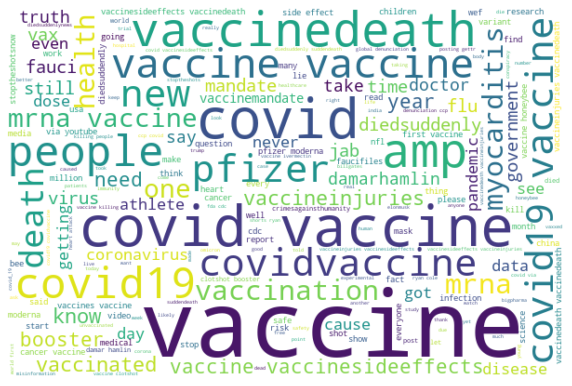

In [43]:
wordcloud = WordCloud(background_color="white",width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# you can make it any shape you want 